# Summary Statistics

## Importing Packages and Datasets

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, norm, poisson, expon

# Loading datasets
spotify = pd.read_csv("datasets/spotify.csv")
heart = pd.read_csv("datasets/heart.csv")

spotify.rename(columns={"top genre": "genre"}, inplace=True)
heart['sex'] = heart['sex'].replace({1: 'Male', 0: 'Female'})

## 1. Measure of Center

### Mean and Median

**Mean:**

The mean, also known as the average, is a measure of central tendency in a set of numerical data. It is calculated by summing up all the values in the dataset and dividing by the number of observations. The mean represents the balance point or the center of mass of the dataset. It is sensitive to extreme values (outliers) and provides a single representative value for the entire dataset.

**Median:**

The median is another measure of central tendency. It is the middle value in a dataset when the values are sorted in ascending or descending order. If there is an even number of observations, the median is the average of the two middle values. The median is less sensitive to extreme values compared to the mean. It provides a value that separates the higher and lower halves of the dataset, making it useful when dealing with skewed distributions or datasets with outliers.

In summary, the mean gives the average value of the dataset, while the median gives the middle value. The mean is influenced by extreme values, whereas the median is more robust in the presence of outliers. Both measures offer insights into the central tendency of a dataset.

In [2]:
# Extracting pop music data from the Spotify dataset
dance_pop = spotify[spotify["genre"] == "dance pop"]

# Calculating mean popularity and median popularity of dance pop music
dance_pop_statistics = dance_pop.groupby("genre")["pop"].agg(["mean", "median"])

# Displaying the results
print("Popularity Statistics for Dance Pop Music:")
print(dance_pop_statistics)

Popularity Statistics for Dance Pop Music:
                mean  median
genre                       
dance pop  64.363914    67.0


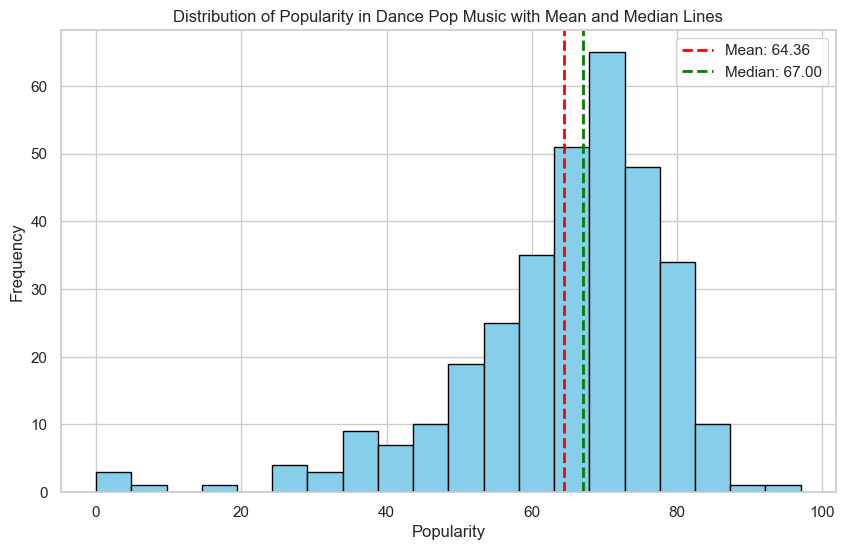

In [3]:
# Set up the plotting style for a professional look
sns.set(style="whitegrid")

# Create a histogram for the popularity of pop music
plt.figure(figsize=(10, 6))
plt.hist(dance_pop["pop"], bins=20, color='skyblue', edgecolor='black')

# Calculate mean and median
mean_popularity = dance_pop["pop"].mean()
median_popularity = dance_pop["pop"].median()

# Adding mean and median lines
plt.axvline(x=mean_popularity, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_popularity:.2f}')
plt.axvline(x=median_popularity, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_popularity:.2f}')

# Adding labels and title
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.title("Distribution of Popularity in Dance Pop Music with Mean and Median Lines")

# Adding a legend
plt.legend()

# Display the histogram
plt.show()

Based on the observed left-skewed distribution of the data, it is recommended to use the median as a more appropriate centrality measure. This is because the median is less affected by extreme values and provides a better representation of the central tendency of the data.

### Measures of Spread

#### Quartiles, quintiles, deciles

These measures of spread help statisticians and data analysts understand the distribution of data points, identify central tendencies, and assess the variability within the dataset. For resting blood pressure, they offer a comprehensive view of how blood pressure values are distributed among individuals in the heart dataset.

In [4]:
# Define resting blood pressure data
resting_blood_pressure = heart["trestbps"]

# Calculate and print quartiles of resting blood pressure
quartiles = np.quantile(resting_blood_pressure, np.linspace(0, 1, 5))
print("Quartiles of Resting Blood Pressure (trestbps):")
print(quartiles)

Quartiles of Resting Blood Pressure (trestbps):
[ 94. 120. 130. 140. 200.]


_Q1 (First Quartile): 94_

This is the lowest 25% of the dataset. Approximately 25% of individuals have resting blood pressure values up to 94.

_Q2 (Second Quartile/Median): 120_

This is the median or the middle value of the dataset. About 50% of individuals have resting blood pressure values up to 120.

_Q3 (Third Quartile): 130_

This represents the lowest 75% of the dataset. Roughly 75% of individuals have resting blood pressure values up to 130.

_Q4 (Fourth Quartile): 140_

This indicates the maximum value in the dataset, representing the full range of resting blood pressure values. All individuals have resting blood pressure values up to 140.

_Q5 (Fifth Quartile): 200_

It's worth noting that the fifth quartile is not a standard quartile; it represents the maximum value in the dataset.

In summary, the quartiles provide a way to understand the spread of resting blood pressure values. The median (Q2) gives us the middle point, and Q1 and Q3 help us understand the lower and upper halves of the dataset, respectively. The maximum value in Q4 indicates the range of blood pressure values in the dataset. The unusual result in Q5 might suggest the presence of outliers or extreme values in the dataset.

In [5]:
# Calculate and print quintiles of resting blood pressure
quintiles = np.quantile(resting_blood_pressure, np.linspace(0, 1, 6))
print("\nQuintiles of Resting Blood Pressure (trestbps):")
print(quintiles)

# Calculate and print deciles of resting blood pressure
deciles = np.quantile(resting_blood_pressure, np.linspace(0, 1, 11))
print("\nDeciles of Resting Blood Pressure (trestbps):")
print(deciles)


Quintiles of Resting Blood Pressure (trestbps):
[ 94. 120. 126. 134. 144. 200.]

Deciles of Resting Blood Pressure (trestbps):
[ 94. 110. 120. 120. 126. 130. 134. 140. 144. 152. 200.]


#### Variance and standard deviation

**Variance:**

_Definition:_ Variance is a statistical measure that describes how much each number in a dataset differs from the mean (average) of the dataset.

_Formula:_ `Variance = Σ(xi - x̄)² / N`, where xi is each data point, `x̄` is the mean, and `N` is the number of data points.

_Interpretation:_ A higher variance indicates that data points are more spread out from the mean. It provides a measure of the overall variability or dispersion within the dataset.

**Standard Deviation:**

_Definition:_ Standard deviation is the square root of the variance. It is another measure of the dispersion of data points in a dataset.

_Formula:_ Standard Deviation = `√Variance`

_Interpretation:_ Like variance, standard deviation quantifies the spread of data points. It has the advantage of being in the same unit as the original data, making it more interpretable. A higher standard deviation indicates more variability in the dataset.

In summary, both variance and standard deviation provide information about the variability of a dataset. They help assess how much individual data points differ from the mean, giving insights into the distribution and spread of values.

In [6]:
# Calculate and display the variance and standard deviation of resting blood pressure by gender
statistics_by_gender = heart.groupby("sex")["trestbps"].agg(['var', 'std'])
print("Statistical Analysis - Resting Blood Pressure by Gender:")
print(statistics_by_gender)

Statistical Analysis - Resting Blood Pressure by Gender:
               var        std
sex                          
Female  383.438196  19.581578
Male    271.054163  16.463723


The variance represents the average squared deviation of each data point from the mean. A higher variance indicates greater variability in resting blood pressure values.

The standard deviation is the square root of the variance and provides a measure of the average distance between each data point and the mean. A higher standard deviation signifies greater dispersion of resting blood pressure values.

The higher variance and standard deviation in the Female group suggest a wider spread and greater variability in resting blood pressure values compared to the Male group. These findings can contribute to a better understanding of the distribution and variability of resting blood pressure based on gender in the dataset.

#### Finding outliers using IQR

The Interquartile Range (IQR) method for identifying outliers involves using the range between the first quartile (Q1) and the third quartile (Q3) of a dataset. The IQR is calculated as Q3 - Q1.

Outliers are then identified as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. These cutoff values can be adjusted to change the sensitivity of outlier detection.

For example, using `.quantile(0.75)` for Q3 and `.quantile(0.25)` for Q1 represents the traditional approach. If a more conservative approach is desired, you can use values like `.quantile(0.90)` for Q3 and `.quantile(0.10)` for Q1, making the method less sensitive to potential outliers. Adjusting these quantile values allows for flexibility in outlier detection based on specific sensitivity preferences.

In [7]:
# Identify outliers considering gender
outliers_by_gender = heart.groupby('sex').apply(lambda group:
    group[(group['trestbps'] < group['trestbps'].quantile(0.25) - 1.5 * (group['trestbps'].quantile(0.75) - group['trestbps'].quantile(0.25))) |
          (group['trestbps'] > group['trestbps'].quantile(0.75) + 1.5 * (group['trestbps'].quantile(0.75) - group['trestbps'].quantile(0.25)))])

print("Outliers in Resting Blood Pressure by Gender:")
print(outliers_by_gender)

Outliers in Resting Blood Pressure by Gender:
            age     sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  target
sex                                          ...                                  
Female 29    55  Female   0       180   327  ...      3.4      1   0     2       0
       47    66  Female   0       178   228  ...      1.0      1   2     3       0
       87    59  Female   0       174   249  ...      0.0      1   0     2       0
       137   64  Female   0       180   325  ...      0.0      2   0     2       1
       175   56  Female   0       200   288  ...      4.0      0   2     3       0
       229   66  Female   0       178   228  ...      1.0      1   2     3       0
       257   64  Female   0       180   325  ...      0.0      2   0     2       1
       294   56  Female   0       200   288  ...      4.0      0   2     3       0
       436   59  Female   0       174   249  ...      0.0      1   0     2       0
       452   66  Female   0       178   2

Analyzing outliers in resting blood pressure by gender acknowledges potential variations in the distribution of data between men and women. This approach helps capture gender-specific patterns and deviations, providing a more nuanced understanding of potential health-related differences.

### describe()

The `describe()` method can be used to generate summary statistics for the numeric features in the dataset. The results include key statistical measures such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. This approach provides a comprehensive initial overview of the central tendency and spread of the numeric data.

In [8]:
spotify.describe().T

,count,mean,std,min,25%,50%,75%,max
year,603.0,2014.592040,2.607057,2010.0,2013.0,2015.0,2017.0,2019.0
bpm,603.0,118.545605,24.795358,0.0,100.0,120.0,129.0,206.0
nrgy,603.0,70.504146,16.310664,0.0,61.0,74.0,82.0,98.0
dnce,603.0,64.379768,13.378718,0.0,57.0,66.0,73.0,97.0
dB,603.0,-5.578773,2.798020,-60.0,-6.0,-5.0,-4.0,-2.0
live,603.0,17.774461,13.102543,0.0,9.0,12.0,24.0,74.0
val,603.0,52.225539,22.513020,0.0,35.0,52.0,69.0,98.0
dur,603.0,224.674959,34.130059,134.0,202.0,221.0,239.5,424.0
acous,603.0,14.326700,20.766165,0.0,2.0,6.0,17.0,99.0
spch,603.0,8.358209,7.483162,0.0,4.0,5.0,9.0,48.0
